<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario:  Predicting whether somebody donated blood in a given month
Blood donations are important in the medical field for a range of reasons, such as assisting patients undergoing surgery, improving the quality of a patient's bloodstream,
managing serious injury/illness or even medical research.

There is a dataset that collects information about how many times a donor donated blood, how much they donated and when they last donated.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

1. Will someone donate blood in March 2007?
2. How soon after the last donation should donors be contacted to maximise chances of another donation?
3. After how many donations, are donors likely to become repeat donors?


# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data (transfusion.data)
- Perform some basic structural cleaning to facilitate the work

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [226]:
data = pd.read_csv(r'/Users/annaxu/Documents/Data Science/DATA/transfusion.data')
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [228]:
data.columns = ['recency', 'frequency', 'monetary', 'time', 'donated']

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   recency    748 non-null    int64
 1   frequency  748 non-null    int64
 2   monetary   748 non-null    int64
 3   time       748 non-null    int64
 4   donated    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [233]:
data[data.duplicated()]

,recency,frequency,monetary,time,donated
18,2,6,1500,15,1
20,2,3,750,4,1
23,2,6,1500,16,1
32,4,10,2500,28,1
43,2,5,1250,16,0
...,...,...,...,...,...
735,23,1,250,23,0
736,23,1,250,23,0
737,23,1,250,23,0
738,23,1,250,23,0


Interpretation:
- 4 features and 1 target variable, all integer datatypes.
- 748 rows, no nulls.
- 215 duplicates but this seems domain-appropriate, especially with a small number of features.

In [236]:
data.describe()

,recency,frequency,monetary,time,donated
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


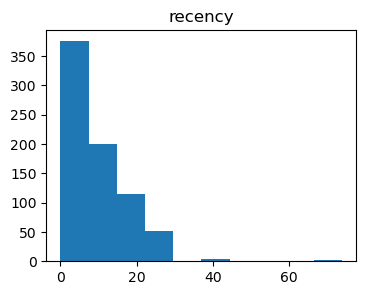

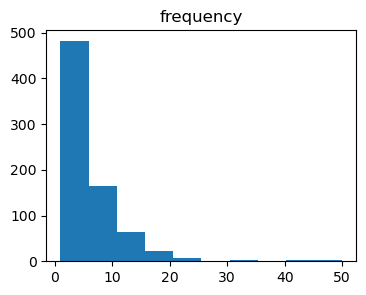

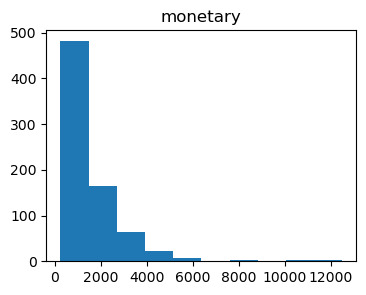

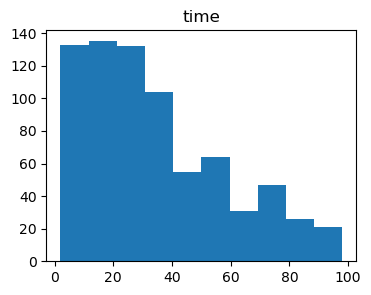

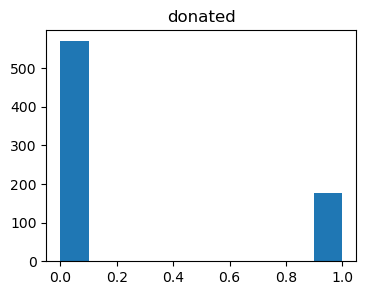

In [238]:
for i in data.columns:
    plt.figure(figsize=(4, 3))
    plt.title(f'{i}')
    plt.hist(data[i])
    plt.show()

Interpretation:
- A few outliers but they appear logical e.g. 12500 c.c. blood over 50 times = average 250 c.c. blood each donation.
- All features are right-skewed, however does not need to be normalised for decision trees. 
- Target variable (whether he/she donated blood) is unbalanced, therefore decision tree hyperparameter will need unbalanced = True.

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

- Inputs: Recency, frequency, monetary, time
- Outputs: Donated
- Modelling: Supervised
- Type: Classification (binary)

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [245]:
# Create training and testing subsets
X = data.drop(columns = 'donated')
y = data['donated']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [364]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [5, 7, 10],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 5}


# Step 9: Fit the Model

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [368]:
y_train_pred = grid_search.predict(X_train)
print('Accuracy score: {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print()
array = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix = pd.DataFrame(array, columns = ['predicted_no_donate', 'predicted_donate'], index = ['does_not_donate', 'does_donate'])
print(confusion_matrix)
print()
print(classification_report(y_train, y_train_pred))

Accuracy score: 0.8021

                 predicted_no_donate  predicted_donate
does_not_donate                  384                44
does_donate                       67                66

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       428
           1       0.60      0.50      0.54       133

    accuracy                           0.80       561
   macro avg       0.73      0.70      0.71       561
weighted avg       0.79      0.80      0.80       561



In [370]:
#class_weight = 'balanced' actually resulted in a lower accuracy score and was hence, excluded from the hyperparameters.

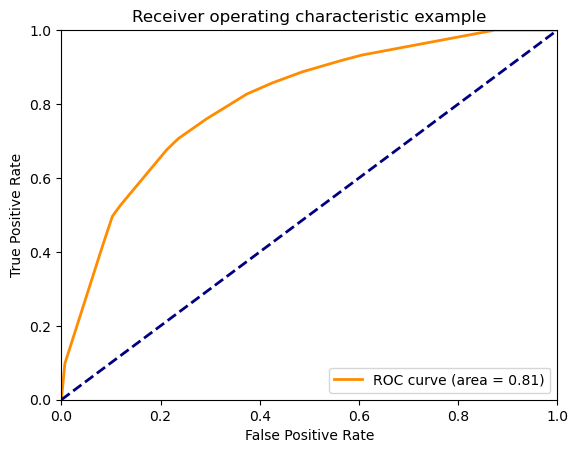

In [372]:
y_train_preds = grid_search.predict_proba(X_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [376]:
y_test_pred = grid_search.predict(X_test)
print('Accuracy score: {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print()
array = metrics.confusion_matrix(y_test, y_test_pred)
confusion_matrix = pd.DataFrame(array, columns = ['predicted_no_donate', 'predicted_donate'], index = ['does_not_donate', 'does_donate'])
print(confusion_matrix)
print()
print(classification_report(y_test, y_test_pred))

Accuracy score: 0.7861

                 predicted_no_donate  predicted_donate
does_not_donate                  126                16
does_donate                       24                21

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       142
           1       0.57      0.47      0.51        45

    accuracy                           0.79       187
   macro avg       0.70      0.68      0.69       187
weighted avg       0.77      0.79      0.78       187



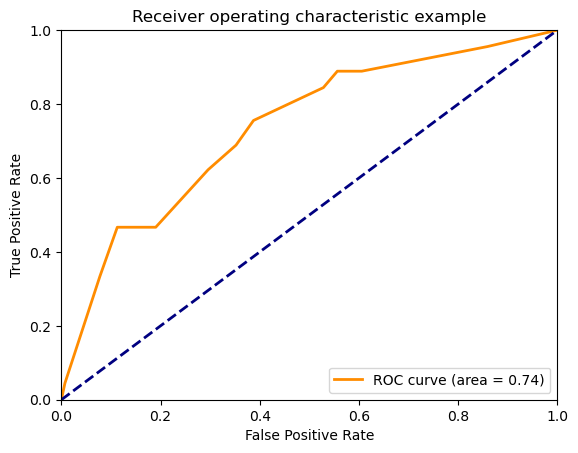

In [378]:
y_test_preds = grid_search.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

- Accuracy = 0.7861 > min. baseline result 0.6895.
- ROC curve = 0.74 > min. baseline result 0.5690.
- Therefore, model performs better than baseline.

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

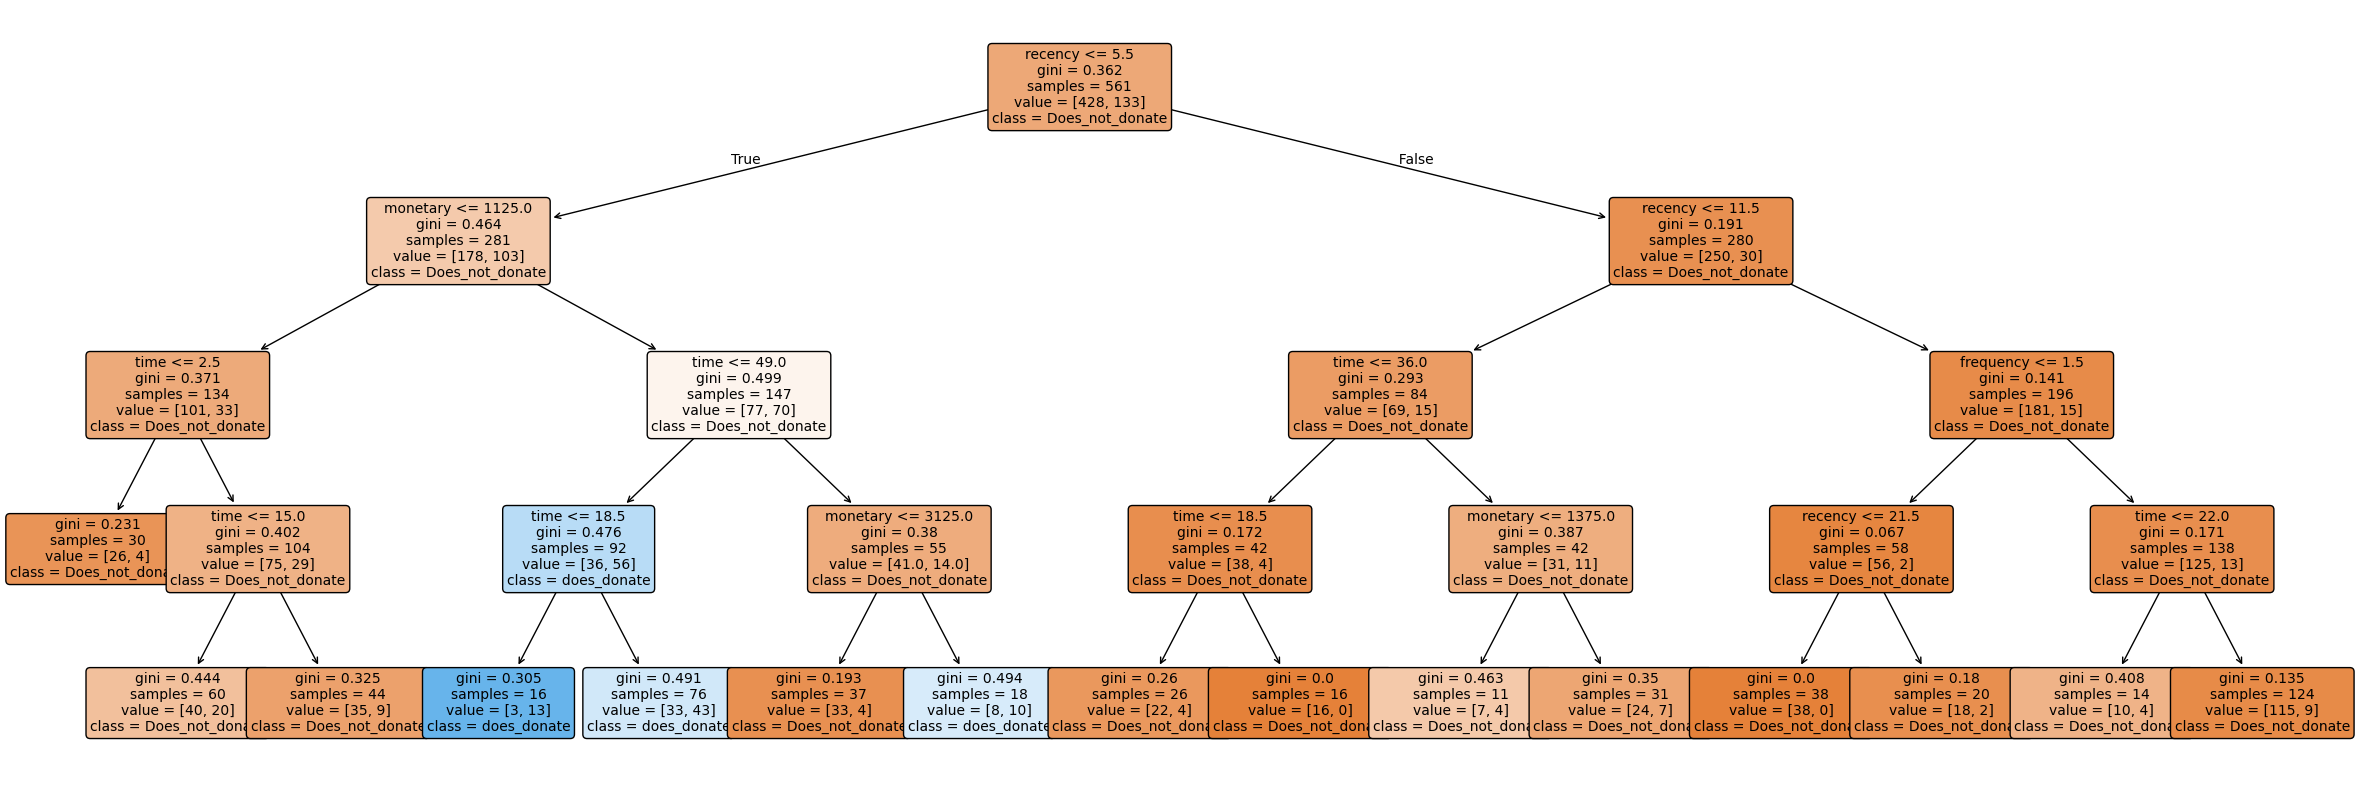

In [391]:
from sklearn import tree

fig = plt.figure(figsize=(30,10))
tree.plot_tree(grid_search.best_estimator_,
                   feature_names=data.columns,
                   class_names=['Does_not_donate', 'does_donate'],
                   filled=True,
              rounded=True,
              fontsize=10)
plt.show()

Someone is more likely to donate blood in March 2007 (blue trails):
- If they donated within the last 5.5 months (recency);
- If they have donated more than 1125 c.c. blood (monetary);
- If it's been 18.5 months or less since their first blood donation;
- OR if it's been more than 49 months since their first blood donation and they've donated more than 3125 c.c. blood in their lifetime



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



